# Exam 1
## Introduction to theory of probabilities
## 9/4/2019

<div class="alert alert-block alert-info">
<b>Midterm Exam: The Beautiful Game.</b>
</div>

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
data = pd.read_csv('Desktop/epldata_final.csv')

In [200]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


<div class="alert alert-block alert-info">
<b>EDA: Preliminary data analysis.</b>
</div>


# The most valuable players in the EPL

In [201]:
most_valuable=data.sort_values(by='market_value', ascending=False)
most_valuable.head(6)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,17.50%,199,2.0,Belgium,0,3,11,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.10%,224,1.0,England,0,2,17,1,0


# The most popular players



In [202]:
most_pop=data.sort_values(by='page_views', ascending=False)
most_pop.head(6)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
143,Wayne Rooney,Everton,31,SS,1,15.0,7664,7.5,20.90%,76,1.0,England,0,4,7,0,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
376,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.60%,225,1.0,England,0,1,17,1,0
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,3.00%,196,2.0,Spain,0,4,5,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0


In [203]:
data_sort=data.sort_values(by='page_views', ascending=False)

# Distribution of Market Value

<BarContainer object of 461 artists>

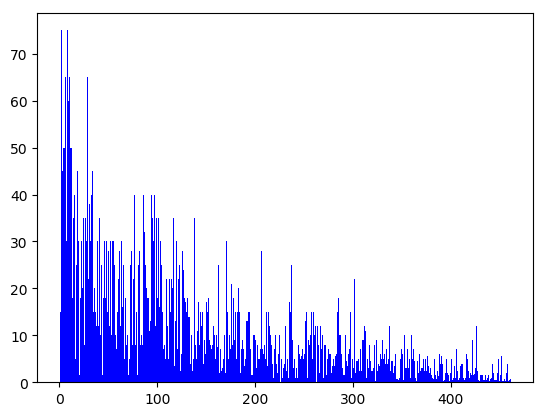

In [204]:
plt.bar(range(1,462),data_sort['market_value'], 1, color="blue")


# Distribution of the most popular players

<BarContainer object of 6 artists>

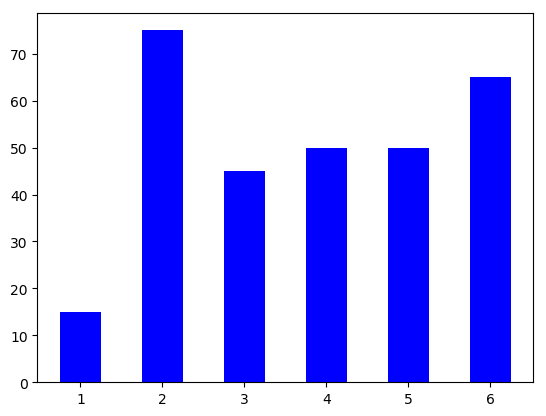

In [205]:
plt.bar(range(1,7),most_pop['market_value'][:6], 0.5, color="blue")

# Distribution after delete the most popular players 

<BarContainer object of 455 artists>

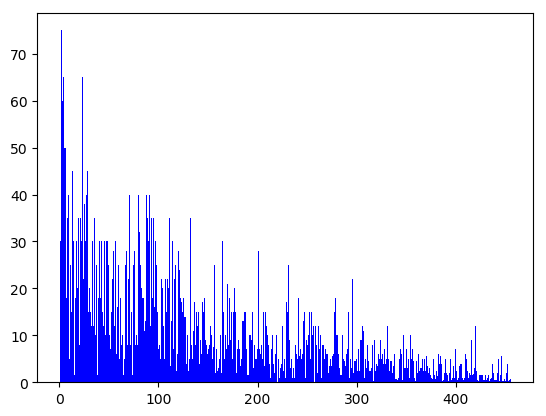

In [206]:
plt.bar(range(1,456),data_sort['market_value'][6:], 1, color="blue")

After sorting data by the page view, we se in the first graph we see that therse is an outliers( the biggests values ) in the third graph after we delete the values of the most popular players , it is clearly that the populat players was an outliers values.Simply the most popular players have the most market value so they are outliers.

<div class="alert alert-block alert-info">
<b>EDA: Detailed data analysis.</b>
</div>


# FPL Valuation

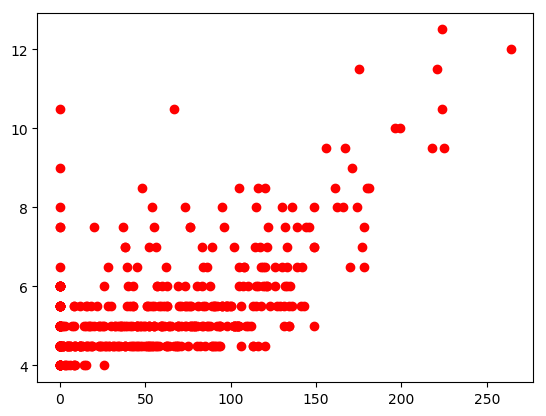

In [207]:
plt.plot( data['fpl_points'],data['fpl_value'], 'ro')

From the graph we see that the fpl points effects on fpl valuation.m

# Market Value with Age

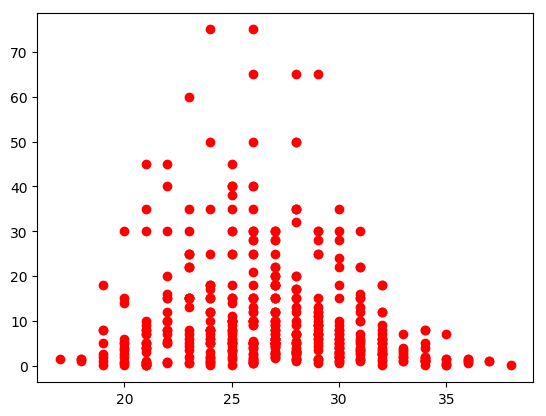

In [208]:
plt.plot( data['age'],data['market_value'], 'ro')

In [209]:
most_valuable['age'].mean()


26.80477223427332

The graph is normal distribution. we see that ages in the meddle ( about the mean ) have the biggest market value. The most valuable players have a mean = 26.8 , which exist on the top of the normal distribution graph.

# Who’s stocking up at which position?

In [210]:
data1=data[data['position_cat']==1]
data2=data[data['position_cat']==2]
data3=data[data['position_cat']==3]
data4=data[data['position_cat']==4]

In [211]:
dec1={}
for i in data1['club']:
    if i in dec1:
        dec1[i]+=1
    else :
        dec1[i]=1
dec2={}
for i in data2['club']:
    if i in dec2:
        dec2[i]+=1
    else :
        dec2[i]=1
dec3={}
for i in data3['club']:
    if i in dec3:
        dec3[i]+=1
    else :
        dec3[i]=1
dec4={}
for i in data4['club']:
    if i in dec4:
        dec4[i]+=1
    else :
        dec4[i]=1


In [212]:
max1=0
max2=0
max3=0
max4=0
for i in dec1.values():
    if max1<i :
        max1=i
for i in dec2.values():
    if max2<i :
        max2=i
for i in dec3.values():
    if max3<i :
        max3=i
for i in dec4.values():
    if max4<i :
        max4=i


# The highest stock  for attackers 

In [213]:
for i in dec1:
    if dec1[i]==max1:
        print(i)

Liverpool
Huddersfield


# The highest stock  for midfielders 

In [214]:
for i in dec2:
    if dec2[i]==max2:
        print(i)

Burnley


#  The highest stock  for defenders  

In [215]:
for i in dec3:
    if dec3[i]==max3:
        print(i)

Arsenal
Manchester+United
Everton
Huddersfield


# The highest stock  for goalkeepers  

In [216]:
for i in dec4:
    if dec4[i]==max4:
        print(i)

Arsenal
Manchester+United
Everton
Bournemouth


# Popularity as a proxy for Ability

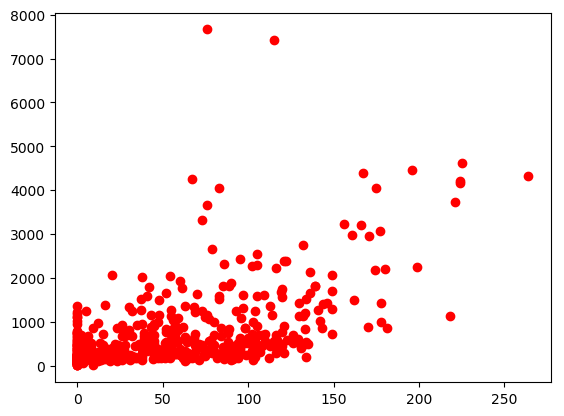

In [218]:
plt.plot( data['fpl_points'],data['page_views'], 'ro')

From the graph we see that plyers that have the biggest fpl points have biggest page views ( have more popularity ) without considering the outliers. The relation is not srtong much becuase for example between the points 200 and 250 we see that the popularity may be big or small.